<a href="https://colab.research.google.com/github/MeeTK26/30DaysOfMLDL/blob/main/ChurnData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
y=df.Exited.values

In [6]:
df.drop(columns=["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

le=LabelEncoder()
df.Geography=le.fit_transform(df.Geography)
df.Gender=le.fit_transform(df.Gender)

data=np.array(df.drop(columns=["Exited"],axis=1))

scaler=StandardScaler()
scaler.fit(data)
X=scaler.transform(data)

In [8]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
dt=DecisionTreeClassifier()
dt_params={'max_depth':[3,5,7,10,None],'criterion':['gini', 'entropy', 'log_loss'],'splitter':['best','random']}

dt_grid=GridSearchCV(dt,dt_params,cv=5,scoring='accuracy')


In [9]:
dt_grid.fit(X_train,y_train)
print(dt_grid.best_estimator_)




DecisionTreeClassifier(criterion='log_loss', max_depth=5)


In [10]:
y_pred=dt_grid.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8575

In [12]:
rf=RandomForestClassifier()
rf_params={'n_estimators':[50,100,150],'criterion':['gini', 'entropy', 'log_loss'],'max_depth':[3,5,7,None]}
rf_grid=GridSearchCV(rf,rf_params,cv=5,scoring='accuracy')

rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, None],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [14]:
print(rf_grid.best_estimator_)

RandomForestClassifier(criterion='entropy', n_estimators=150)


In [15]:
y_pred=rf_grid.predict(X_test)

In [16]:
accuracy_score(y_test,y_pred)

0.867

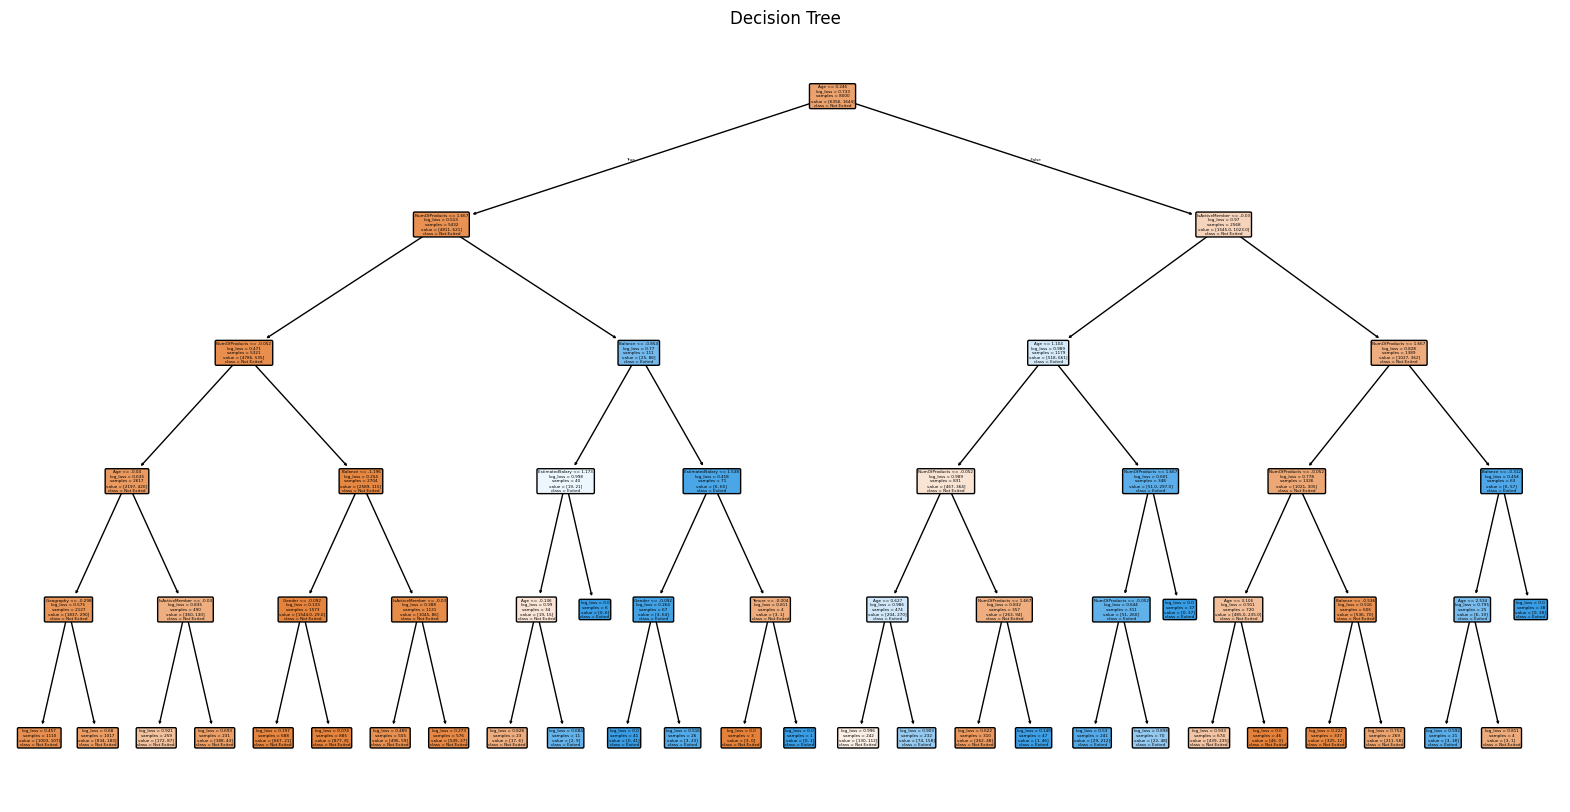

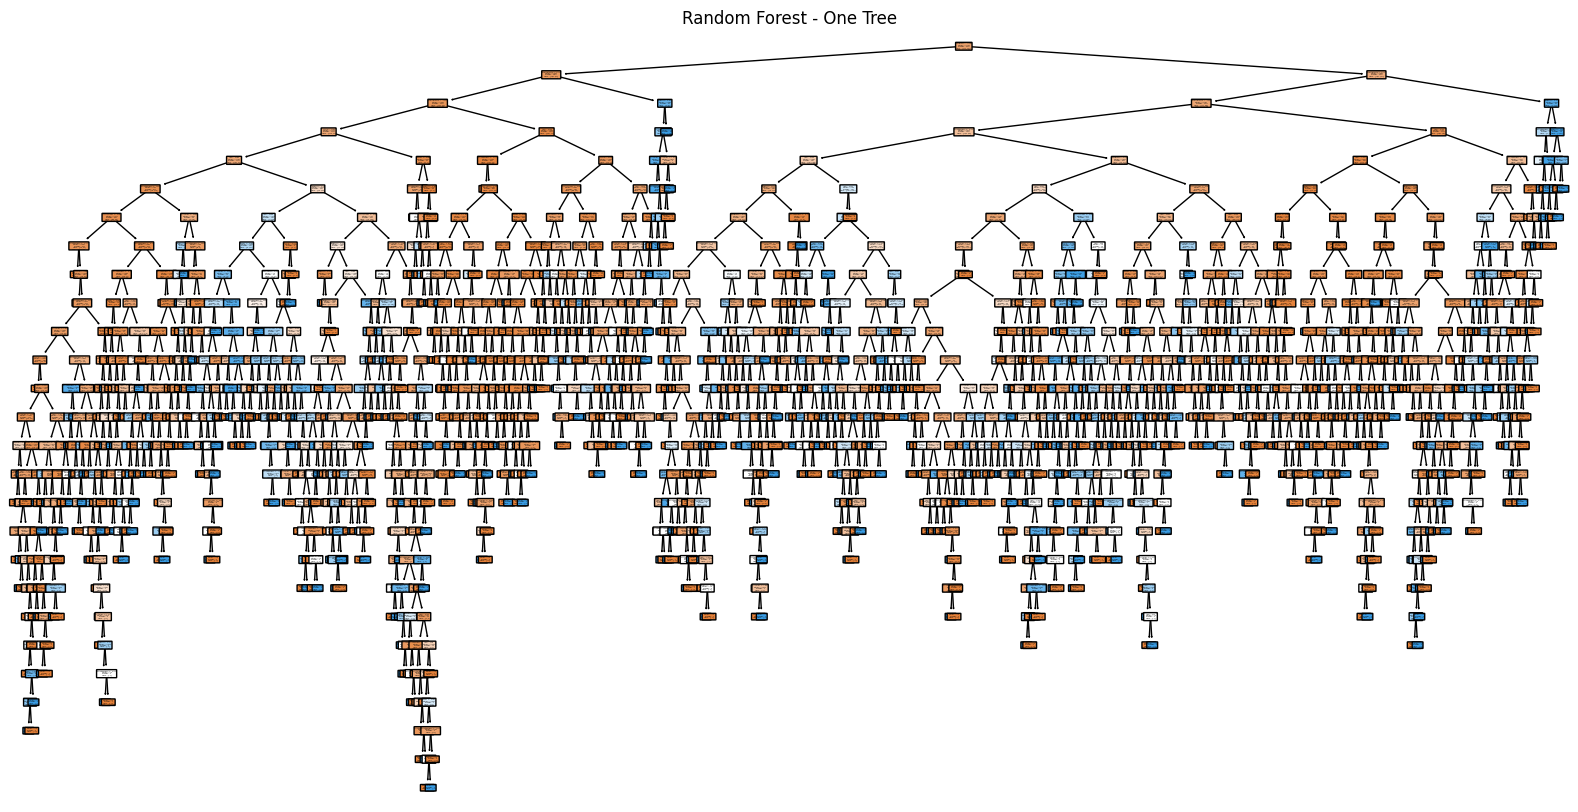

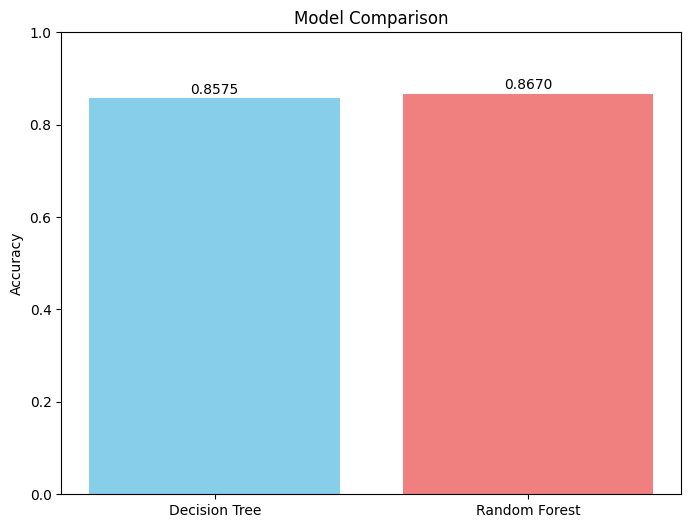

In [18]:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize=(20,10))
plot_tree(dt_grid.best_estimator_, filled=True, feature_names=df.columns[:-1], class_names=['Not Exited', 'Exited'], rounded=True)
plt.title("Decision Tree")
plt.show()


rf_estimator = rf_grid.best_estimator_.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(rf_estimator, filled=True, feature_names=df.columns[:-1], class_names=['Not Exited', 'Exited'], rounded=True)
plt.title("Random Forest - One Tree")
plt.show()

dt_accuracy = accuracy_score(y_test, dt_grid.predict(X_test))
rf_accuracy = accuracy_score(y_test, rf_grid.predict(X_test))


models = ['Decision Tree', 'Random Forest']
accuracies = [dt_accuracy, rf_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()
